# Task 5: Movie Recommendation System
## Description
- Dataset (Recommended): MovieLens 100K Dataset (Kaggle)
- Build a system that recommends movies based on user similarity
- Use a user-item matrix to compute similarity scores
- Recommend top-rated unseen movies for a given user
- Evaluate performance using precision at K

# Downloading the dataset

In [3]:
!kaggle datasets download prajitdatta/movielens-100k-dataset

Dataset URL: https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/4.77M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.77M/4.77M [00:00<00:00, 1.40GB/s]


In [4]:
!unzip movielens-100k-dataset.zip

Archive:  movielens-100k-dataset.zip
  inflating: ml-100k/README          
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


# Inspecting the data and performing EDA

In [2]:
import pandas as pd

# Loading the ratings data
columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=columns)

# Printing few lines
print(ratings.shape)
ratings.head()

(100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# Checking datatypes and null values
ratings.info()
ratings.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [4]:
# Checking basic statistics
ratings.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [5]:
# Exploring users and movies in the dataset
n_users = ratings['user_id'].nunique()
n_movies = ratings['item_id'].nunique()
print(f"Number of users: {n_users}")
print(f"Number of movies: {n_movies}")

Number of users: 943
Number of movies: 1682


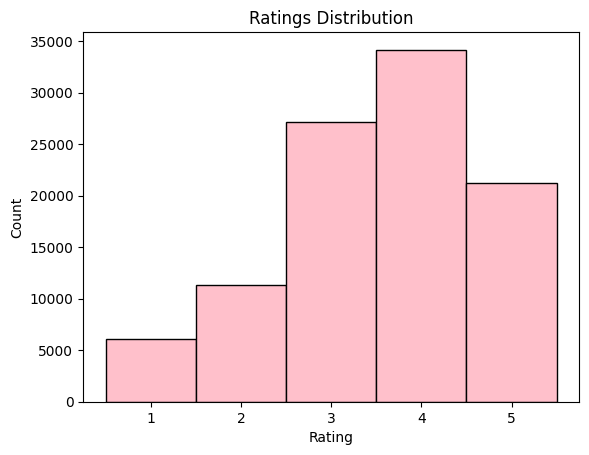

In [10]:
# Checking the distribution of the ratings
import matplotlib.pyplot as plt

plt.hist(ratings['rating'], bins=[0.5,1.5,2.5,3.5,4.5,5.5], color='pink', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [11]:
# Checking for dataset balance by checking ratings per user 
ratings_per_user = ratings.groupby('user_id')['rating'].count()
ratings_per_user.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64

In [12]:
ratings_per_movie = ratings.groupby('item_id')['rating'].count()
ratings_per_movie.describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64

# Creating the recommendation system

In [13]:
# we create the matrix that maps users and movies to do collaborative filtering

user_item_matrix = ratings.pivot_table(index='user_id', columns='item_id', values='rating')
user_item_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Computing the user means to avoid user bias
user_means = user_item_matrix.mean(axis=1)

# Subtracting each user's mean
user_item_centered = user_item_matrix.sub(user_means, axis=0)


# Replacing NaN values in the matrix with 0 values for similarity computation
user_item_centered_filled = user_item_centered.fillna(0)

# Calculating users similarity using cosine similarity
user_sim_matrix = cosine_similarity(user_item_centered_filled)
user_sim = pd.DataFrame(user_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

In [18]:
# Creating the recommendation logic
def recommend_movies(user_id, train_matrix, user_sim_df, user_means, k_neighbors=5):
   
    if user_id not in train_matrix.index:
        return pd.Series(dtype=float)
    
    # Getting the user similarity scores (drop self)
    sims = user_sim_df.loc[user_id].drop(user_id)
    if k_neighbors:
        sims = sims.nlargest(k_neighbors)
    
    # Getting the movies that are rated by the user
    user_ratings = train_matrix.loc[user_id]
    unseen_items = user_ratings[user_ratings.isna()].index
    if len(unseen_items) == 0:
        return pd.Series(dtype=float)
    
    # Neighbor ratings matrix
    neighbors = sims.index
    neighbor_ratings = train_matrix.loc[neighbors, unseen_items]
    
    # Computing the mean-centered neighbor ratings
    neighbor_means = user_means[neighbors]
    centered = neighbor_ratings.sub(neighbor_means, axis=0)
    
    # Multiplying each neighbor's centered ratings by similarity
    weighted = centered.mul(sims, axis=0)
    
    # Summing over neighbors for each item
    numer = weighted.sum(axis=0)
    # Summing the absolute similarities for neighbors who rated the item
    denom = (neighbor_ratings.notna().mul(sims, axis=0).abs()).sum(axis=0)
    
    # Avoiding division by zero
    valid = denom != 0
    preds_centered = pd.Series(index=unseen_items, dtype=float)
    preds_centered[valid] = numer[valid] / denom[valid]
    
    # Adding back the user's mean
    preds = preds_centered + user_means[user_id]
    # Sortting the highest predicted rating first
    preds = preds.dropna().sort_values(ascending=False)
    return preds

In [27]:
# Preparing inputs
train_matrix = user_item_matrix
user_sim_df = user_sim
user_means = user_means

# Predicting the top 10 movies for user 1 using top 50 neighbors
preds = recommend_movies(1, train_matrix, user_sim_df, user_means, k_neighbors=50)
preds.head(10)

item_id
1495    5.555632
874     5.512810
868     5.512810
848     5.512810
811     5.512810
851     5.512810
814     5.512810
909     5.512810
1367    5.330791
1529    5.330791
dtype: float64

In [28]:
# Making the results readable 
import pandas as pd

# Loading the movie titles 
movie_cols = ['item_id', 'title'] + [f'col{i}' for i in range(22)]
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movie_cols, encoding='latin-1', usecols=[0, 1])
movies['item_id'] = movies['item_id'].astype(int)

def recommend_titles_for_user(user_id, n=10, k_neighbors=50):
    preds = recommend_movies(user_id, train_matrix, user_sim_df, user_means, k_neighbors=k_neighbors)
    if preds.empty:
        print("No recommendations available for this user.")
        return pd.DataFrame()
    
    # Clipping predicted ratings between 1 and 5
    preds = preds.clip(1, 5)
    topn = preds.head(n)
    
    # Mapping the item_id to the movie title
    titles = movies.set_index('item_id').reindex(topn.index)['title']
    
    # Combining results
    result = pd.DataFrame({
        'movie_id': topn.index,
        'title': titles.values,
        'predicted_rating': topn.values
    })
    
    return result

recommend_titles_for_user(1, n=10, k_neighbors=50)

,movie_id,title,predicted_rating
0,1495,Flirt (1995),5.0
1,874,Career Girls (1997),5.0
2,868,Hearts and Minds (1996),5.0
3,848,"Murder, My Sweet (1944)",5.0
4,811,Thirty-Two Short Films About Glenn Gould (1993),5.0
5,851,Two or Three Things I Know About Her (1966),5.0
6,814,"Great Day in Harlem, A (1994)",5.0
7,909,Dangerous Beauty (1998),5.0
8,1367,Faust (1994),5.0
9,1529,Underground (1995),5.0


# Evaluation

In [40]:
# Loading the test split
test_columns = ['user_id', 'item_id', 'rating', 'timestamp']
test = pd.read_csv('ml-100k/u1.test', sep='\t', names=test_columns)
test = test.drop(columns=['timestamp'])
test.head()

,user_id,item_id,rating
0,1,6,5
1,1,10,3
2,1,12,5
3,1,14,5
4,1,17,3


In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_rmse(train_matrix, test, user_sim_df, user_means, k_neighbors=50):
    preds_list, actual_list = [], []

    for row in test.itertuples(index=False):
        user, item, actual_rating = row

        # Skipping if user or item not in training data
        if user not in train_matrix.index or item not in train_matrix.columns:
            continue

        # Getting all predictions for this user
        preds = recommend_movies(user, train_matrix, user_sim_df, user_means, k_neighbors)
        if item in preds.index:
            pred_rating = preds[item]
            preds_list.append(pred_rating)
            actual_list.append(actual_rating)

    if len(preds_list) == 0:
        print("No valid predictions were made. Try lowering k_neighbors or checking test coverage.")
        return None

    rmse = np.sqrt(mean_squared_error(actual_list, preds_list))
    print(f"RMSE: {rmse:.4f}")
    return rmse


# Running the evaluation
evaluate_rmse(train_matrix, test, user_sim_df, user_means, k_neighbors=50)

No valid predictions were made. Try lowering k_neighbors or checking test coverage.
